In [1]:
%load_ext autoreload
%autoreload 2
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
from dark_emulator_public import dark_emulator
import os, sys, time, json, copy
import matplotlib.pyplot as plt
from collections import OrderedDict as od
from scipy.interpolate import InterpolatedUnivariateSpline as ius
from scipy.interpolate import interp2d, interp1d
from scipy.integrate import simps
from tqdm import tqdm
import hsc3x2pt

using dark_emulator at  /Users/sugiyamasunao/Documents/python_package/dark_emulator_public/dark_emulator/__init__.py


In [3]:
power_b1 = hsc3x2pt.power_b1_class()

initialize cosmo_class
Initialize pklin emulator
initialize propagator emulator
Initialize sigma_d emulator
initialize cross-correlation emulator
initialize auto-correlation emulator
Initialize sigmaM emulator
initialize xinl emulator


# Year 1, single source bin analysis

In [55]:
%%time
dirname = './single_source_ClY1'
fisher2x2pt = hsc3x2pt.getFisher(dirname, power_b1, probes=['w', 'gamma_t'], 
                                 label='2x2pt (Y1, 1)', Omega_s={'gamma_t':400, 'xi':400})
fisherCS = hsc3x2pt.getFisher(dirname, power_b1, probes=['xi+','xi-'], 
                              label='Cosmic Shear (Y1, 1)', Omega_s={'gamma_t':400, 'xi':400})
fisher3x2pt = hsc3x2pt.getFisher(dirname, power_b1, 
                                 label='3x2pt (Y1, 1)', Omega_s={'gamma_t':400, 'xi':400})

using dark_emulator at  /Users/sugiyamasunao/Documents/python_package/dark_emulator_public/dark_emulator/__init__.py
cov.shape = (66, 66), dim(data)=(66,)
cov.shape = (17, 17), dim(data)=(17,)
skip b1lowz because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass2 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamaglowz because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass2 because this is lens galaxy param, while probes does not include any lens related probe.
cov.shape = (83, 83), dim(data)=(83,)
CPU times: user 43.2 s, sys: 1.71 s, total: 44.9 s
Wall time: 11.5 s


In [56]:
fisher2x2pt.show1Sigma()

omega_b         -- 0.031789273185476266
omega_c         -- 0.07211135523583934
Omega_de        -- 0.009995999318270363
sigma8          -- 0.0959203214273253
ns              -- 0.16555467645709454
b1lowz          -- 0.3711328011508281
b1cmass1        -- 0.2375684729822256
b1cmass2        -- 0.24645324648660885
alphamaglowz    -- 97.820428018342
alphamagcmass1  -- 14.940579355664616
alphamagcmass2  -- 14.235586652177291
dzph            -- 0.8146486453703687
dm              -- 0.513303921808668


In [57]:
fisherCS.show1Sigma()

omega_b   -- 0.9788163577830835
omega_c   -- 2.9301416111175476
Omega_de  -- 6.306023601406807
sigma8    -- 4.4803240406134215
ns        -- 3.9965514245579965
dzph      -- 6.149294033805955
dm        -- 4.554733895210684


In [58]:
fisher3x2pt.show1Sigma()

omega_b         -- 0.03096425830676252
omega_c         -- 0.06647931036966502
Omega_de        -- 0.008096333223297983
sigma8          -- 0.0711511395829349
ns              -- 0.1056943194910544
b1lowz          -- 0.26072585900271383
b1cmass1        -- 0.20880993754902705
b1cmass2        -- 0.22231837422910028
alphamaglowz    -- 44.87301313441423
alphamagcmass1  -- 3.5466857170592365
alphamagcmass2  -- 2.696458649246723
dzph            -- 0.2759911644627745
dm              -- 0.26546472325005094


In [59]:
corner = hsc3x2pt.corner_class()

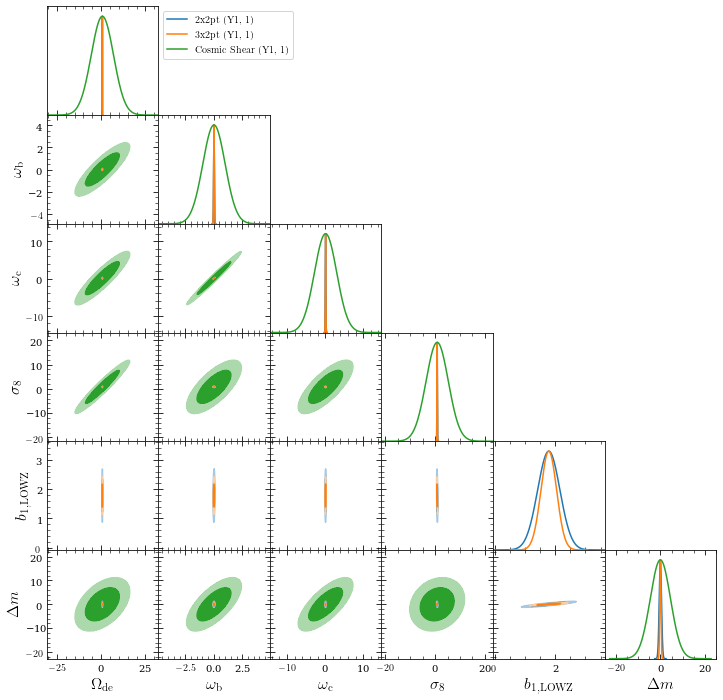

In [60]:
corner.plot_corner([fisher2x2pt, fisher3x2pt, fisherCS], ['Omega_de', 'omega_b', 'omega_c', 'sigma8', 'b1lowz', 'dm'], 
                   figsize_ratio=2, usetex=True)

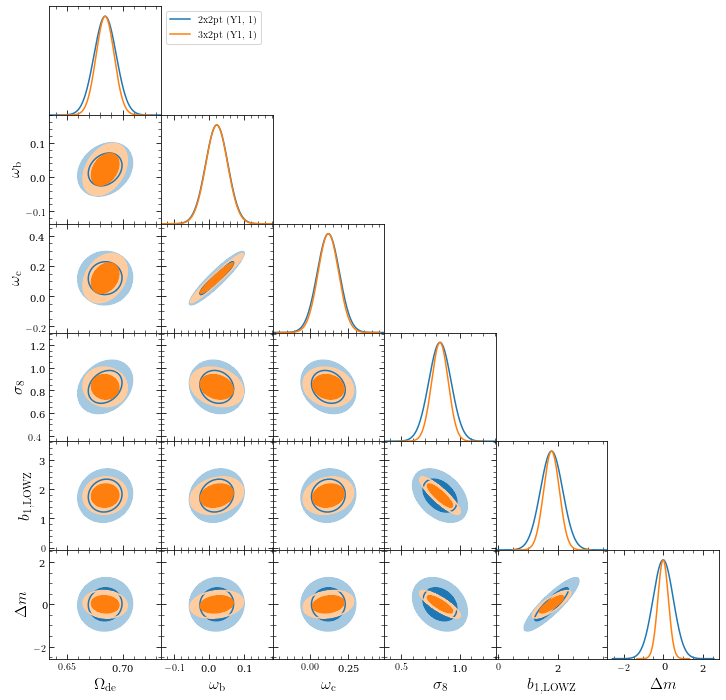

In [61]:
corner.plot_corner([fisher2x2pt, fisher3x2pt], ['Omega_de', 'omega_b', 'omega_c', 'sigma8', 'b1lowz', 'dm'], 
                   figsize_ratio=2, usetex=True)

# Year 1, double source bin analysis

In [49]:
%%time
dirname = './double_source_ClY1'
fisher2x2pt2 = hsc3x2pt.getFisher(dirname, power_b1, probes=['w', 'gamma_t'], 
                                  label='2x2pt (Y1, 2)', Omega_s={'gamma_t':400, 'xi':400})
fisherCS2 = hsc3x2pt.getFisher(dirname, power_b1, probes=['xi+','xi-'], 
                               label='Cosmic Shear (Y1, 2)', Omega_s={'gamma_t':400, 'xi':400})
fisher3x2pt2 = hsc3x2pt.getFisher(dirname, power_b1, 
                                  label='3x2pt (Y1, 2)', Omega_s={'gamma_t':400, 'xi':400})

using dark_emulator at  /Users/sugiyamasunao/Documents/python_package/dark_emulator_public/dark_emulator/__init__.py
cov.shape = (90, 90), dim(data)=(90,)
cov.shape = (51, 51), dim(data)=(51,)
skip b1lowz because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip b1cmass2 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamaglowz because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass1 because this is lens galaxy param, while probes does not include any lens related probe.
skip alphamagcmass2 because this is lens galaxy param, while probes does not include any lens related probe.
cov.shape = (141, 141), dim(data)=(141,)
CPU times: user 2min 5s, sys: 5.68 s, total: 2min 11s
Wall time: 34.2 s


In [50]:
fisher2x2pt2.show1Sigma()

omega_b         -- 0.031760186213875725
omega_c         -- 0.07204221850471244
Omega_de        -- 0.009988013323996629
sigma8          -- 0.0956204427416044
ns              -- 0.16529830176811852
b1lowz          -- 0.36702171866187455
b1cmass1        -- 0.23694029885836015
b1cmass2        -- 0.24624597437298656
alphamaglowz    -- 96.56150120190895
alphamagcmass1  -- 14.662592450184098
alphamagcmass2  -- 13.928812314617351
dzph1           -- 0.5846427919927638
dm1             -- 0.5001796399469911
dzph2           -- 1.0942078177516628
dm2             -- 0.5158035725023874


In [51]:
fisherCS2.show1Sigma()

omega_b   -- 0.2993452721654083
omega_c   -- 0.6691926635949784
Omega_de  -- 0.9589106538854012
sigma8    -- 0.6357798287047515
ns        -- 0.6877047939080565
dzph1     -- 0.7985709418766611
dm1       -- 1.3105966273420482
dzph2     -- 1.0450164918990315
dm2       -- 1.3674353968110655


In [52]:
fisher3x2pt2.show1Sigma()

omega_b         -- 0.03076444062595048
omega_c         -- 0.06520429907968664
Omega_de        -- 0.007813718839053093
sigma8          -- 0.06203049041603864
ns              -- 0.09455993797012337
b1lowz          -- 0.21114200781099524
b1cmass1        -- 0.20037519740428075
b1cmass2        -- 0.2150552771736679
alphamaglowz    -- 32.3150672857916
alphamagcmass1  -- 3.4910124205761104
alphamagcmass2  -- 1.9305909581189407
dzph1           -- 0.08023375692669187
dm1             -- 0.13828495065935165
dzph2           -- 0.12276643197052109
dm2             -- 0.1458553444306008


In [53]:
corner = hsc3x2pt.corner_class()

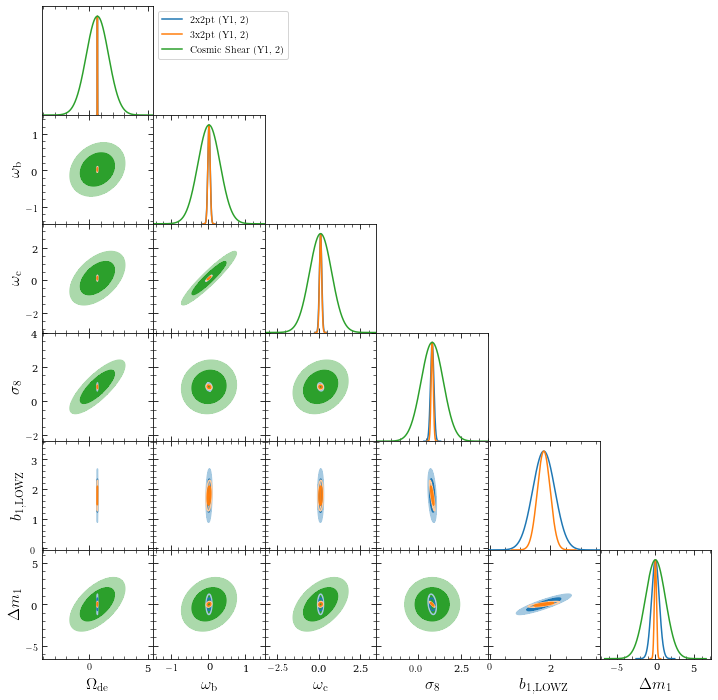

In [54]:
corner.plot_corner([fisher2x2pt2, fisher3x2pt2, fisherCS2], ['Omega_de', 'omega_b', 'omega_c', 'sigma8', 'b1lowz', 'dm1'], 
                   figsize_ratio=2, usetex=True)

## double vs single source anlaysis

dm1 is not included any fisher analysis. Omitting it.
dzph1 is not included any fisher analysis. Omitting it.


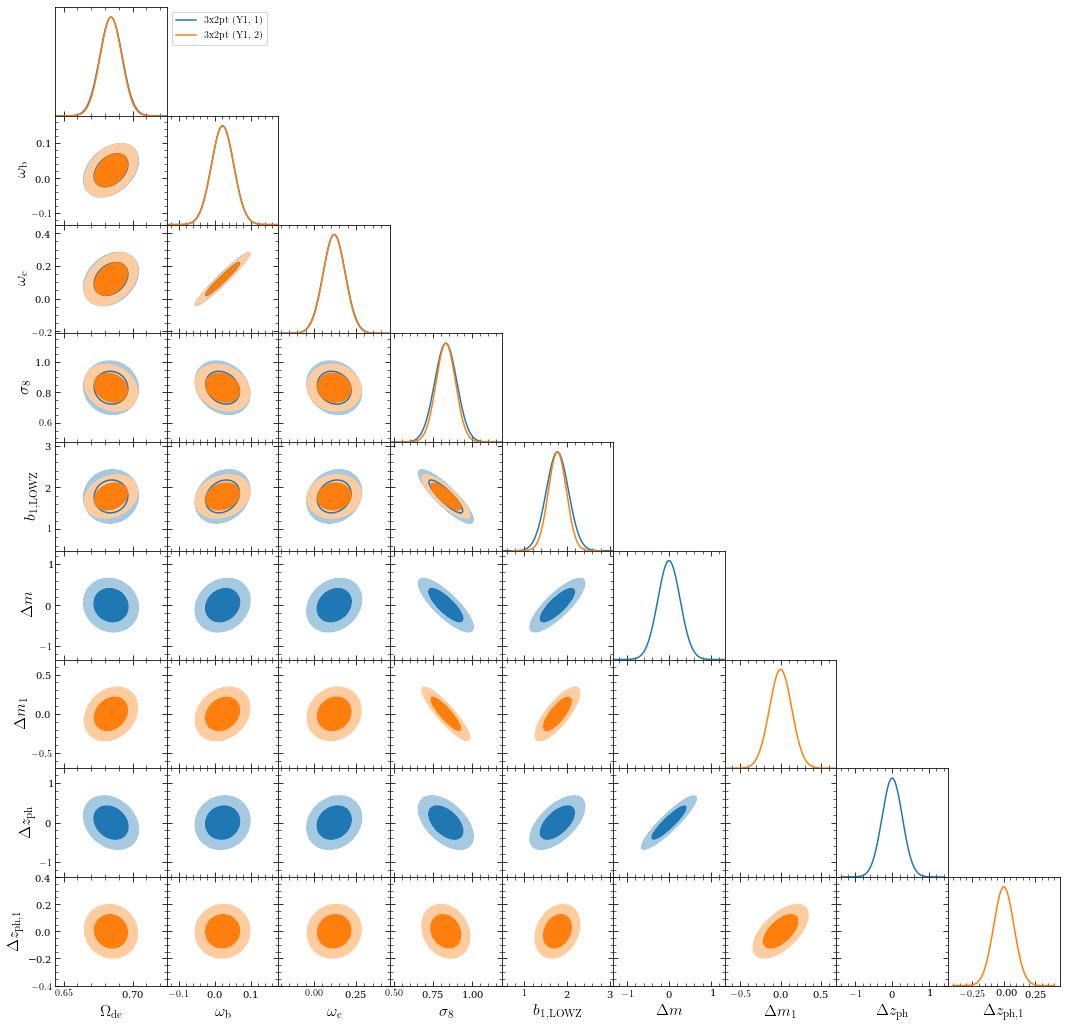

In [19]:
corner.plot_corner([fisher3x2pt, fisher3x2pt2], ['Omega_de', 'omega_b', 'omega_c', 'sigma8', 'b1lowz', 'dm', 'dm1', 'dzph', 'dzph1'], 
                   figsize_ratio=2, usetex=True)

# Cosmic Shear alone: tomography with quadruple sources

In [20]:
%%time
dirname = './quadruple_source_ClY1'
fisherCSquad = hsc3x2pt.getFisher(dirname, power_b1, 
                                  label='CS (quad)', Omega_s={'gamma_t':400, 'xi':400})

cov.shape = (170, 170), dim(data)=(170,)
CPU times: user 3min 29s, sys: 10.5 s, total: 3min 39s
Wall time: 55.5 s


In [21]:
corner = hsc3x2pt.corner_class()

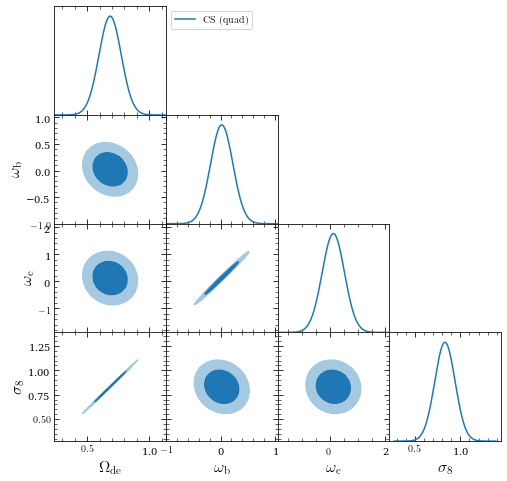

In [22]:
corner.plot_corner([fisherCSquad], ['Omega_de', 'omega_b', 'omega_c', 'sigma8'], 
                   figsize_ratio=2, usetex=True)

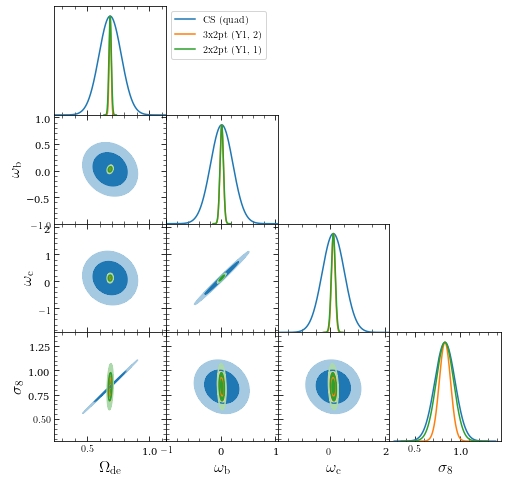

In [23]:
corner.plot_corner([fisherCSquad, fisher3x2pt2, fisher2x2pt], ['Omega_de', 'omega_b', 'omega_c', 'sigma8'], 
                   figsize_ratio=2, usetex=True)